<a href="https://colab.research.google.com/github/kushagrasharma-13/Python/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation

Linear Regression

Support Vector Regression

Decision Tree Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load "HousingData.csv" dataset
dataset = pd.read_csv('/content/drive/MyDrive/Python/Datasets/HousingData.csv')

In [ ]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [ ]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<ipython-input-8-5e7df7889d04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MEDV'], bins=30)


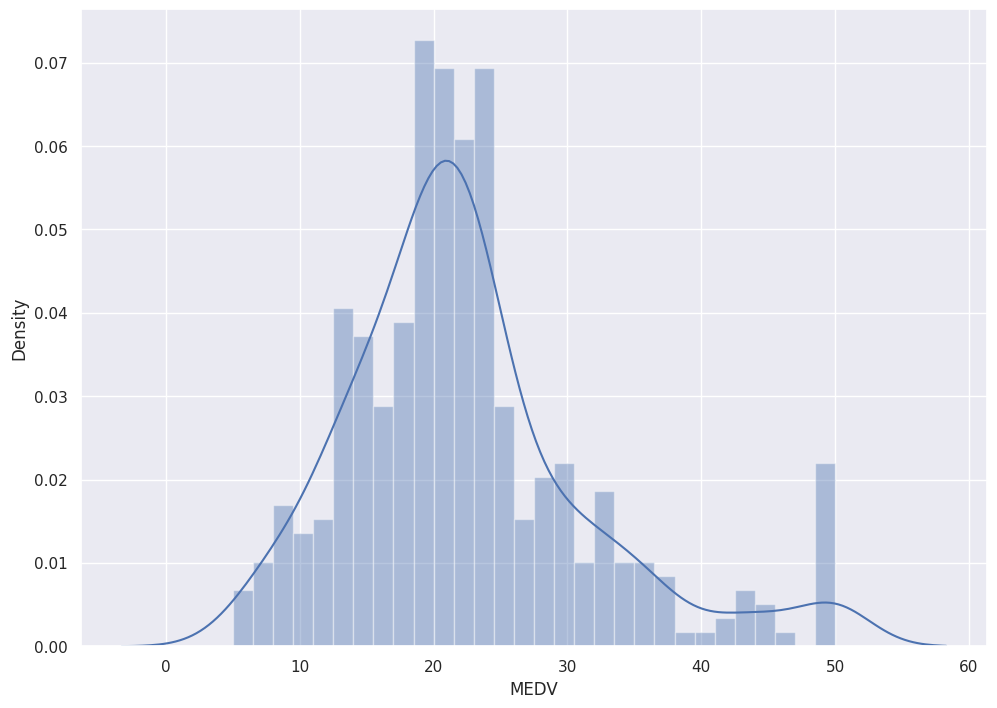

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['MEDV'], bins=30)
plt.show()

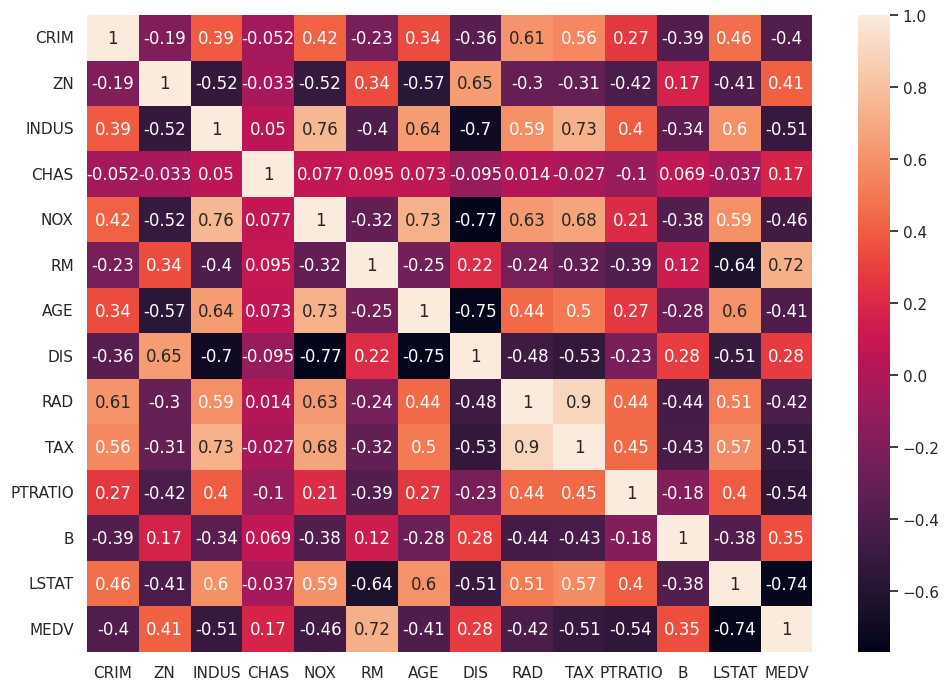

<Figure size 1000x1000 with 0 Axes>

In [ ]:
correlation_matrix = dataset.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(correlation_matrix, annot=True)
plt.figure(figsize=(10, 10))
plt.show()

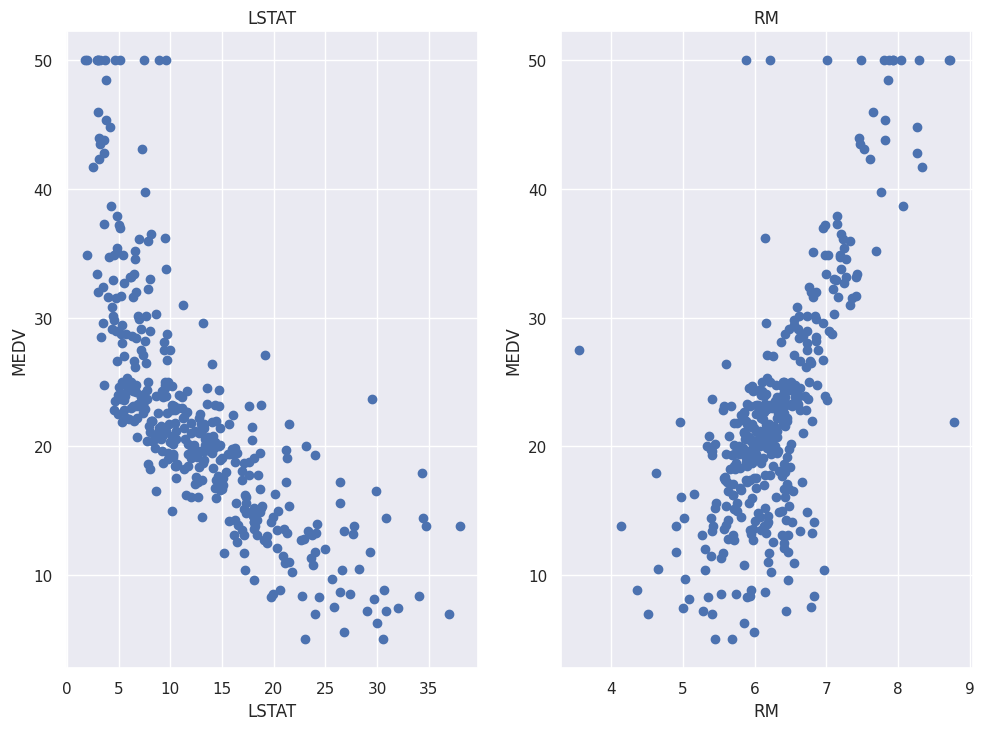

In [ ]:
features = ['LSTAT', 'RM']
target = dataset['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
x = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
y = dataset['MEDV']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [ ]:
x_train.shape

(315, 2)

In [ ]:
x_test.shape

(79, 2)

In [ ]:
y_train.shape

(315,)

In [ ]:
y_test.shape

(79,)

# **Linear Regression**

In [ ]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = LR.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.981788036611337
R2 score is 0.6900038035365308


# **Support Vector Regression**

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
y_pred_svr = svr.predict(x_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test,y_pred_svr))
print('MSE:', mean_squared_error(y_test,y_pred_svr))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_svr)))

MAE: 3.7529164285256424
MSE: 26.60532101158267
RMSE: 5.158034607443292


# **Decision Tree Regression**

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dtr = dtr.predict(x_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test,y_pred_dtr))
print('MSE:', mean_squared_error(y_test,y_pred_dtr))
print('RMSE:',np.sqrt( mean_squared_error(y_test,y_pred_dtr)))

MAE: 4.559493670886075
MSE: 50.16987341772151
RMSE: 7.083069491239057
